In [130]:
import pandas as pd
import numpy as np

In [131]:
data = pd.read_excel("champagne_new.xlsx", index_col=0)

In [132]:
data.index = pd.to_datetime(data.index)

In [133]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [134]:
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


<AxesSubplot:xlabel='Month'>

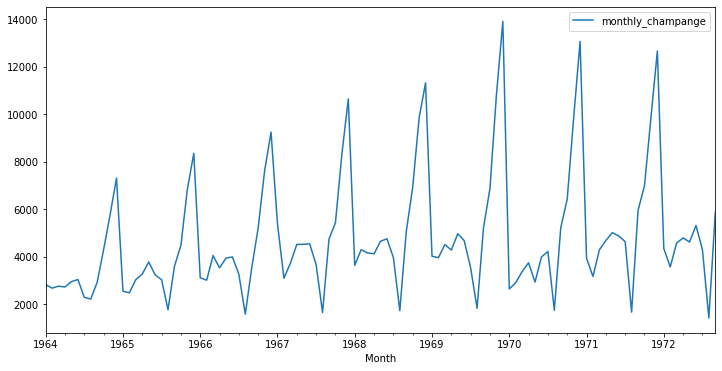

In [136]:
import matplotlib.pyplot as plt
data.plot(figsize=(12,6))

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
result

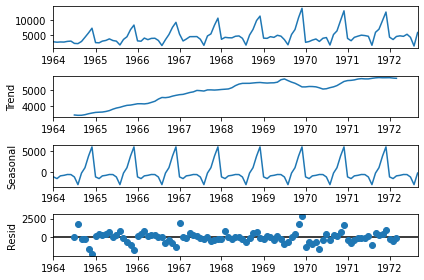

In [138]:
fig = result.plot()
plt.show()

Nhận xét:Ta có thể thấy rõ tính seasonal, trend (có xu hướng tăng) và resid component của tập dữ liệu. 

In [139]:
from pmdarima import auto_arima

In [140]:
stepwise_model = auto_arima(data, start_p=2, start_q=2,
max_p=5, max_q=5, m=12,
start_P=1, seasonal=True,
d=1, D=1, trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1491.853, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1491.669, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1491.700, Time=0.58 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.17 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1491.649, Time=0.54 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.32 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=0.78 sec
 ARIMA(1,1,1)(1,1,1)[12]     

In [144]:
print(stepwise_model.aic())

1485.1904967170237


In [145]:
train = data.loc['1964-01-01':'1970-07-01']
test = data.loc['1970-07-01':]

In [146]:
len(test)

27

In [147]:
len(train)

79

In [148]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [149]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [150]:
future_forecast

array([ 1940.0475086 ,  5225.17904359,  6870.8825648 , 10715.67151043,
       13693.32129221,  2740.77224857,  2974.59176921,  3452.30241552,
        3772.80822185,  3083.12923354,  4031.50865539,  4149.0201979 ,
        1919.17995055,  5213.8058759 ,  6859.86145523, 10711.7146306 ,
       13700.45515995,  2721.32024372,  2957.28502199,  3434.44579047,
        3759.00720613,  3059.22315683,  4016.666952  ,  4143.47786508,
        1909.777188  ,  5203.62513243,  6849.65186372])

In [151]:
from sklearn.metrics import mean_absolute_error

In [152]:
mean_absolute_error(test['monthly_champange'], future_forecast)

2542.452212390124

In [153]:
future_forecast = pd.DataFrame(future_forecast,
index = test.index,
columns=['Prediction'])
df_merge = test.join(future_forecast)
df_merge.tail()

,monthly_champange,Prediction
Month,,
1972-05-01,4618,4016.666952
1972-06-01,5312,4143.477865
1972-07-01,4298,1909.777188
1972-08-01,1413,5203.625132
1972-09-01,5877,6849.651864


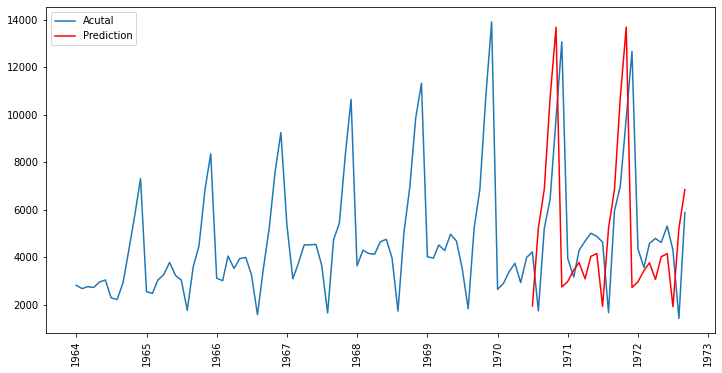

In [154]:
plt.figure(figsize=(12,6))
plt.plot(data, label='Acutal')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [155]:
future_forecast_next9months = stepwise_model.predict(n_periods=len(test)+9)
future_forecast_next9months

array([ 1940.0475086 ,  5225.17904359,  6870.8825648 , 10715.67151043,
       13693.32129221,  2740.77224857,  2974.59176921,  3452.30241552,
        3772.80822185,  3083.12923354,  4031.50865539,  4149.0201979 ,
        1919.17995055,  5213.8058759 ,  6859.86145523, 10711.7146306 ,
       13700.45515995,  2721.32024372,  2957.28502199,  3434.44579047,
        3759.00720613,  3059.22315683,  4016.666952  ,  4143.47786508,
        1909.777188  ,  5203.62513243,  6849.65186372, 10700.92618825,
       13688.75792939,  2711.80148916,  2947.59048263,  3424.79630871,
        3749.02540323,  3050.06937388,  4006.77042421,  4132.8193365 ])

In [156]:
future_forecast_next9months[len(test):]

array([10700.92618825, 13688.75792939,  2711.80148916,  2947.59048263,
        3424.79630871,  3749.02540323,  3050.06937388,  4006.77042421,
        4132.8193365 ])

In [157]:
months = pd.date_range('1972-10-01','1973-06-01',
freq='MS').strftime("%Y-%m-%d").tolist()
np.array(months)

array(['1972-10-01', '1972-11-01', '1972-12-01', '1973-01-01',
       '1973-02-01', '1973-03-01', '1973-04-01', '1973-05-01',
       '1973-06-01'], dtype='<U10')

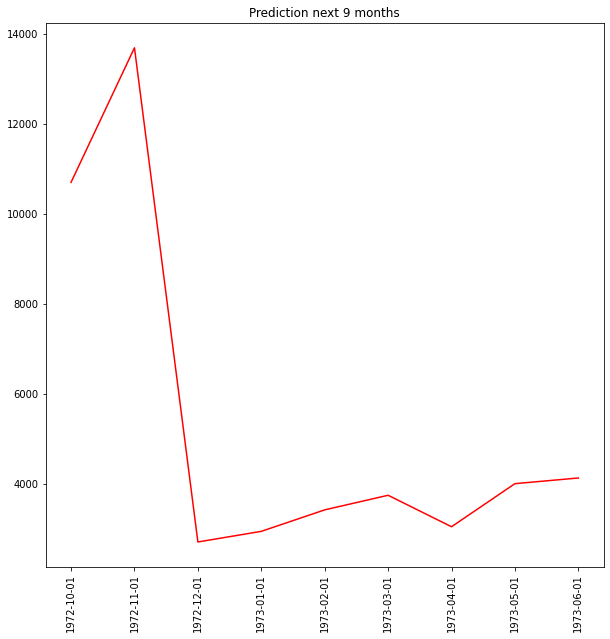

In [158]:
plt.figure(figsize=(10,10))
plt.plot(np.array(months),future_forecast_next9months[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months")
plt.show()

In [159]:
future_forecast_next9months[len(test):]

array([10700.92618825, 13688.75792939,  2711.80148916,  2947.59048263,
        3424.79630871,  3749.02540323,  3050.06937388,  4006.77042421,
        4132.8193365 ])

In [160]:
new_predict = pd.DataFrame({
'Date' : months,
'Monthly Champagne': future_forecast_next9months[len(test):]}
)
new_predict

,Date,Monthly Champagne
0,1972-10-01,10700.926188
1,1972-11-01,13688.757929
2,1972-12-01,2711.801489
3,1973-01-01,2947.590483
4,1973-02-01,3424.796309
5,1973-03-01,3749.025403
6,1973-04-01,3050.069374
7,1973-05-01,4006.770424
8,1973-06-01,4132.819337


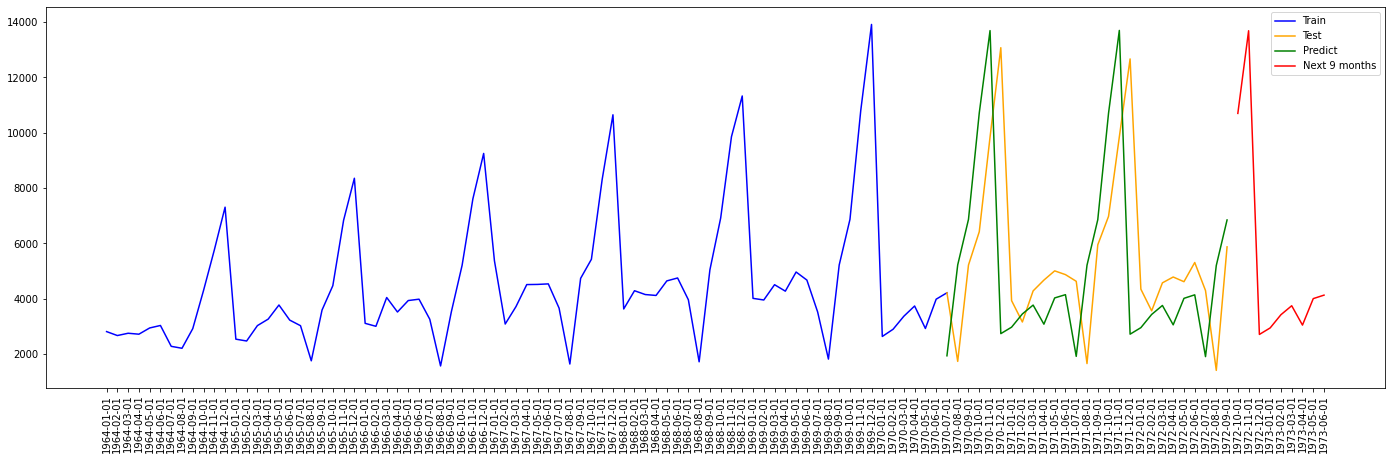

In [161]:
plt.figure(figsize=(24,7))
plt.plot(np.array(pd.date_range('1964-01-01','1970-07-01',
freq='MS').strftime("%Y-%m-%d").tolist()),train, label='Train', color='blue')
plt.plot(np.array(pd.date_range('1970-07-01','1972-09-01',
freq='MS').strftime("%Y-%m-%d").tolist()),test, label='Test', color='orange')
plt.plot(np.array(pd.date_range('1970-07-01','1972-09-01',
freq='MS').strftime("%Y-%m-%d").tolist()),future_forecast, label='Predict', color='green')
plt.plot(np.array(months),future_forecast_next9months[len(test):], label='Next 9 months' ,color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()